In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
f1 = pd.read_csv('phone_user_review_file_1.csv')
f2 = pd.read_csv('phone_user_review_file_2.csv')
f3 = pd.read_csv('phone_user_review_file_3.csv')
f4 = pd.read_csv('phone_user_review_file_4.csv')
f5 = pd.read_csv('phone_user_review_file_5.csv')
f6 = pd.read_csv('phone_user_review_file_6.csv')

In [2]:
# Compiling data into a single dataframe.
def df_append(a,b,c,d,e,f):
    a = a.append(b, ignore_index = True)
    a = a.append(c, ignore_index = True)
    a = a.append(d, ignore_index = True)
    a = a.append(e, ignore_index = True)
    a = a.append(f, ignore_index = True)
    return(a)

df_main = df_append(f1,f2,f3,f4,f5,f6)

NameError: name 'f1' is not defined

In [4]:
df_main.shape

(1415133, 11)

In [5]:
df_main.score.unique()

array([10. ,  6. ,  9.2,  4. ,  8. ,  2. ,  9.6,  7.2,  6.8,  9. ,  8.3,
        8.8,  8.4,  5.3,  7. ,  6.4,  7.6,  nan,  5.2,  3.2,  4.4,  2.8,
        5.6,  3.6,  4.8,  1. ,  5. ,  3. ,  2.4,  9.3,  8.5,  9.5,  6.5,
        5.5,  9.8,  8.2,  8.6,  7.8,  9.4,  6.6,  6.2,  7.5,  9.9,  2.7,
        8.7,  6.7,  3.3,  7.7,  7.3,  9.7,  6.3,  7.4,  5.7,  4.7,  4.3,
        5.8,  4.2,  4.5,  2.2,  5.4,  7.9,  3.5,  4.6,  3.7,  2.5,  3.4,
        7.1,  8.1,  1.2,  1.4,  3.8,  9.1,  2.6,  1.6,  1.7,  1.5,  1.8,
        2.3,  6.1,  5.9,  1.3,  0.2,  0.4,  8.9,  6.9,  0.6,  4.9])

 NaN values are present in the rating section
 
 Ratings - Decimal Format.
 
 Max rating is 10

In [6]:
# Rounding off Ratings.

df_main.score = round(df_main.score)

df_main.score.unique()

array([10.,  6.,  9.,  4.,  8.,  2.,  7.,  5., nan,  3.,  1.,  0.])

 As we can see lots of attributes are not important.
 
 So keeping only essential attributes.
 
 i:e score, extract, author, product.

In [7]:
df2 = df_main.iloc[:,lambda df_main:[6,8,9,10]]
df2.head(10)

,score,extract,author,product
0,10.0,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,10.0,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8
2,6.0,Adequate feel. Nice heft. Processor's still sl...,R. Craig,"Samsung Galaxy S8 (64GB) G950U 5.8"" 4G LTE Unl..."
3,9.0,Never disappointed. One of the reasons I've be...,Buster2020,Samsung Galaxy S8 64GB (AT&T)
4,4.0,I've now found that i'm in a group of people t...,S Ate Mine,Samsung Galaxy S8
5,10.0,I am the type of person who never would comple...,BDB76,Samsung Galaxy S8
6,4.0,The way this Samsung S8 phone operates is more...,KLC30306,Samsung Galaxy S8
7,6.0,I bought this phone very excited to use it. I ...,Mnhy,Samsung Galaxy S8
8,6.0,It is an extremely advanced and truly a Smart ...,Mr Alan,Samsung Galaxy S8
9,8.0,"Great phone with a PHENOMENAL Camera, not all ...",Raven Wolf Song,Samsung Galaxy S8


In [8]:
# checking for missing values.
df2.isnull().sum()

score      63489
extract    19361
author     63202
product        1
dtype: int64

In [9]:
# dropping records where there are null values.
df3 = df2.dropna()
# check for duplicates.
df3.duplicated().any()

True

In [10]:
# Removing Duplicates.
df4 = df3.drop_duplicates()

In [11]:
print(df3.shape)
print(df4.shape)

(1275917, 4)
(1258979, 4)


16938 duplicate records removed.

In [12]:
# Keeping only 1000000 records using random_state of 612
df5 = df4.sample(n=1000000, random_state=612)
print(df5.shape)
df_s = df5.sample(n=5000,random_state=612)
df_s.shape

(1000000, 4)


(5000, 4)

In [13]:
df5

,score,extract,author,product
502195,8.0,Excellent Phone for Moderate users..,Amazon Customer,"Motorola Moto G Turbo (Black, 16GB)"
134551,10.0,Great phone so far so good. Value for money.,Bargain-Entertainment,Samsung Galaxy J3 SM-J320F 8GB 4G Black - smar...
1253879,10.0,"Отличная модель. Советую брать, если нужен кно...",Zuko Firebender,Nokia N95
542035,10.0,Telefono ricevuto in due giorni dall'acquisto....,Daniele,Apple iPhone 5s 16GB 4G Oro
183918,10.0,Nagyon jó telefon tudásilag is és az ára is el...,Erika B.,HUAWEI P8 Lite (Alice) DualSIM fekete kártyafü...
...,...,...,...,...
15108,10.0,device stupendo schermo senza paragoni neri as...,fabio roma,Samsung G935 Galaxy S7 Edge Smartphone da 32GB...
278121,10.0,"H30-U10 Phone is sturdy, nice pics, great disp...",Gabby,Huawei Honor 3C Android 4.2 Quad Core 1.3GHz 3...
776362,6.0,Takes great video and pictures.,samantha nichols,BLU Studio 5.0 C HD Smartphone - Unlocked - Blue
258294,10.0,"ARRIVATO IN UN GIORNO,SEMPLICE,PRATICO, PER ME...",Mary C,"Asus ZenFone 2 Laser Smartphone da 32 GB, Dual..."


### Top rated mobiles.

In [14]:
df5.groupby('product')['score'].count().sort_values(ascending = False).head()

product
Lenovo Vibe K4 Note (White,16GB)       4135
Lenovo Vibe K4 Note (Black, 16GB)      3488
OnePlus 3 (Graphite, 64 GB)            3244
OnePlus 3 (Soft Gold, 64 GB)           2802
Lenovo Vibe K5 (Gold, VoLTE update)    1992
Name: score, dtype: int64

Lenovo Vibe K4 Note (White,16GB) is the top rated mobile.

### Top Users with Maximum Reviews.

In [15]:
df5.groupby('author')['extract'].count().sort_values(ascending=False).head()

author
Amazon Customer    60857
Cliente Amazon     15398
e-bit               6575
Client d'Amazon     6096
Amazon Kunde        3759
Name: extract, dtype: int64

Amazon Customer user has given most reviews.

#### Products having more than 50 ratings and Users who have given more than 50 ratings.

In [16]:
df6 = df5.groupby(['product','author'])['score'].count().sort_values(ascending=False)
print(df6.head())
df7 = pd.DataFrame(df6)
df7.head()

product                              author         
Lenovo Vibe K4 Note (White,16GB)     Amazon Customer    2423
Lenovo Vibe K4 Note (Black, 16GB)    Amazon Customer    2019
OnePlus 3 (Graphite, 64 GB)          Amazon Customer    1438
OnePlus 3 (Soft Gold, 64 GB)         Amazon Customer    1315
Lenovo Vibe K5 (Gold, VoLTE update)  Amazon Customer    1222
Name: score, dtype: int64


,,score
product,author,
"Lenovo Vibe K4 Note (White,16GB)",Amazon Customer,2423
"Lenovo Vibe K4 Note (Black, 16GB)",Amazon Customer,2019
"OnePlus 3 (Graphite, 64 GB)",Amazon Customer,1438
"OnePlus 3 (Soft Gold, 64 GB)",Amazon Customer,1315
"Lenovo Vibe K5 (Gold, VoLTE update)",Amazon Customer,1222


#### Users who have given more than 50 ratings.

In [17]:
df8 = df7[df7['score']>50]
df8.shape

(235, 1)

The total number of records with score > 50 are 235.

C:\Anaconda\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


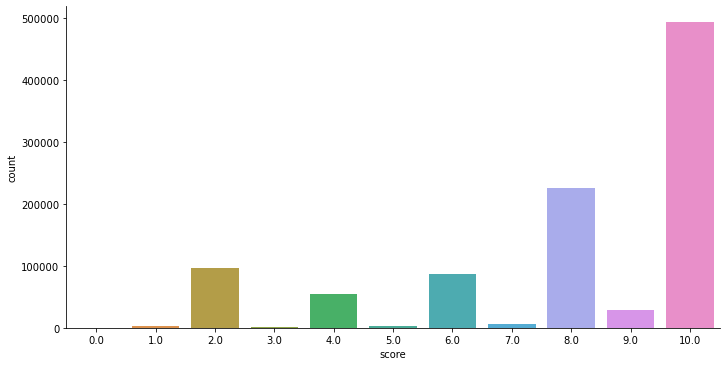

In [18]:
sns.factorplot("score", data=df5,aspect=2,kind='count')
plt.show();

Half of the mobiles are rated 10.

ratings with 1,3,5,7,9 are very low.

## Popularity based recommendation model.

In [19]:
# To recommend top 5 mdel phones.

p_mob = pd.DataFrame(df_s[['product','score']].groupby('product')['score'].mean().sort_values(ascending=False))

from pandas import DataFrame


def left_align(p_mob: DataFrame):
    left_aligned_df = p_mob.style.set_properties(**{'text-align': 'left'})
    left_aligned_df = left_aligned_df.set_table_styles(
        [dict(selector='th', props=[('text-align', 'left')])]
    )
    return left_aligned_df
left_align(p_mob.head(10))


,score
product,
1st Film de protection d'écran en Verre trempé pour Samsung Galaxy A3 Transparent,10.000000
"Microsoft Nokia Lumia 820 Smartphone (10,9 cm (4,3 Zoll) ClearBlack OLED WVGA Touchscreen, 8 Megapixel Kamera, 1,5 GHz Dual-Core-Prozessor, NFC, LTE-f??hig, Windows Phone 8) gloss white",10.000000
Sim Free Motorola Moto E 3rd Generation Mobile Phone,10.000000
Motorola Atrix 2,10.000000
"Moto G4 Smartphone, Android, 5.5"", 4G LTE, SIM Free, 16GB, White",10.000000
"MoKo ZenFone 2 Coque - [Résistant aux rayures] Etui de Protection Double Couche Série Hybride d'Armure + Pare-chocs pour ASUS ZenFone 2 ZE550ML / ZE551ML / Deluxe / Deluxe Edition Spéciale, NOIR",10.000000
Microsoft Мобильный телефон Microsoft Lumia 550,10.000000
"Microsoft Smartphone Microsoft Lumia 640 XL Dual Sim 3G - Dual Chip Windows Phone 8.1 Câm. 13MP Tela 5.7""",10.000000
"Microsoft Nokia X3-02.5 Handy (6,1 cm (2,4 Zoll) Display, 5 Megapixel Kamera, Touch and Type) rot",10.000000


As you can see there are lot of phones with highest ratings.

## Collaborative filtering Based Recommedation Model

In [20]:
#  data of records where a user has rated 500 or more
cnt = pd.value_counts(df_s['author'])
ratings = df_s[df_s['author'].isin(cnt[cnt >- 500].index)]
ratings.shape

(5000, 4)

In [21]:
pip install surprise

Note: you may need to restart the kernel to use updated packages.


Only required attributes, product name and rating.

In [22]:
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor

reader = Reader(rating_scale=(1, 10))

data = Dataset.load_from_df(ratings[['author', 'product', 'score']], reader)
data.df.head(2)

,author,product,score
332956,Stefano C.,"Lenovo Motorola Moto G LTE Smartphone, Display...",10.0
1139541,YERYE_BERMUDEZ,Nokia 5800 Xpress Music,10.0


In [23]:
# Splitting into train and test data by using surprise.
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.25,random_state=123)

### Collaborative filtering using SVD

In [24]:
from surprise import SVD, KNNWithMeans
from surprise import accuracy

In [25]:
svd_model = SVD(n_factors=5,biased=False)
svd_model.fit(trainset)
testset[0]
test_pred_svd = svd_model.test(testset)
# compute RMSE
accuracy.rmse(test_pred_svd)

RMSE: 2.8867


2.886671096030021

In [26]:
# Mobile recommnendation for a user named Amazon Customer
pred_svd= pd.DataFrame(test_pred_svd)
pred_svd[pred_svd['uid'] == "Amazon Customer"][['iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head(10)

,iid,r_ui,est
19,"Lenovo Vibe K5 (Grey, VoLTE update)",10.0,9.323855
965,"Lenovo Phab 2 Plus Smartphone (Grey, JBL earph...",10.0,4.817610
331,"BLU Studio M HD - 5.0"" Smartphone -Global GSM ...",10.0,1.697082
938,BlackBerry Classic black,10.0,7.953333
374,"Lenovo Vibe K4 Note (Black, 16GB)",10.0,4.969503
400,"BLU Vivo XL Smartphone - 5.5"" 4G LTE - GSM Unl...",10.0,1.000000
899,Sony Mobile Xperia M2 Smartphone débloqué 4G (...,10.0,7.953333
416,"Apple iPhone 6 plus unlocked Cellphone, 128GB ...",10.0,7.953333
851,Samsung Galaxy S7 SM-G930F 32GB 4G Gold - smar...,10.0,7.953333
838,"HTC Inspire 4G Unlocked Phone A9192, Black",10.0,1.000000


### Collaborative filtering using KNNWith Means.

USER BASED

In [27]:
from surprise import KNNWithMeans
from surprise import accuracy

In [28]:
r_user = KNNWithMeans(k=10, sim_options={ 'user_based': True})

r_user.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [29]:
test_pred_u=r_user.test(testset)
print(accuracy.rmse(test_pred_u))

RMSE: 2.6427
2.6427130694223098


In [30]:
uid = "Amazon Customer"  
iid = "OnePlus 3 (Graphite, 64 GB)"  

pred_uc = r_user.predict(uid, iid, r_ui=0.0, verbose=True)

user: Amazon Customer item: OnePlus 3 (Graphite, 64 GB) r_ui = 0.00   est = 7.00   {'actual_k': 10, 'was_impossible': False}


Top user based recommendations.

In [31]:
pred_uc = pd.DataFrame(test_pred_u)
pred_uc[pred_uc['uid'] == "Amazon Customer"][['iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head(10)

,iid,r_ui,est
19,"Lenovo Vibe K5 (Grey, VoLTE update)",10.0,9.200000
965,"Lenovo Phab 2 Plus Smartphone (Grey, JBL earph...",10.0,6.018089
331,"BLU Studio M HD - 5.0"" Smartphone -Global GSM ...",10.0,6.948718
938,BlackBerry Classic black,10.0,7.953333
374,"Lenovo Vibe K4 Note (Black, 16GB)",10.0,5.293466
400,"BLU Vivo XL Smartphone - 5.5"" 4G LTE - GSM Unl...",10.0,6.948718
899,Sony Mobile Xperia M2 Smartphone débloqué 4G (...,10.0,7.953333
416,"Apple iPhone 6 plus unlocked Cellphone, 128GB ...",10.0,7.953333
851,Samsung Galaxy S7 SM-G930F 32GB 4G Gold - smar...,10.0,7.953333
838,"HTC Inspire 4G Unlocked Phone A9192, Black",10.0,6.948718


Item Based.

In [32]:
r_item = KNNWithMeans(k=10, sim_options={ 'user_based': False})

r_item.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [33]:
test_pred_i=r_item.test(testset)
print(accuracy.rmse(test_pred_i))

RMSE: 2.6685
2.6685187559596573


In [34]:
uid = "Amazon Customer"  
iid = "OnePlus 3 (Graphite, 64 GB)"  

pred_ic = r_item.predict(uid, iid, r_ui=0.0, verbose=True)

user: Amazon Customer item: OnePlus 3 (Graphite, 64 GB) r_ui = 0.00   est = 7.01   {'actual_k': 10, 'was_impossible': False}


Top item based recommendations.

In [35]:

pred_ic = pd.DataFrame(test_pred_i)
pred_ic[pred_ic['uid'] == "Amazon Customer"][['iid', 'r_ui','est']].sort_values(by = 'r_ui',ascending = False).head(10)

,iid,r_ui,est
19,"Lenovo Vibe K5 (Grey, VoLTE update)",10.0,9.311111
965,"Lenovo Phab 2 Plus Smartphone (Grey, JBL earph...",10.0,6.004329
331,"BLU Studio M HD - 5.0"" Smartphone -Global GSM ...",10.0,10.000000
938,BlackBerry Classic black,10.0,7.953333
374,"Lenovo Vibe K4 Note (Black, 16GB)",10.0,5.160000
400,"BLU Vivo XL Smartphone - 5.5"" 4G LTE - GSM Unl...",10.0,6.000000
899,Sony Mobile Xperia M2 Smartphone débloqué 4G (...,10.0,7.953333
416,"Apple iPhone 6 plus unlocked Cellphone, 128GB ...",10.0,7.953333
851,Samsung Galaxy S7 SM-G930F 32GB 4G Gold - smar...,10.0,7.953333
838,"HTC Inspire 4G Unlocked Phone A9192, Black",10.0,6.000000


In [36]:
# Cross Validation.
from surprise.model_selection import KFold
kf = KFold(n_splits=5)
for trainset, testset in kf.split(data):
    r_item.fit(trainset)
    predictions = r_item.test(testset)
    accuracy.rmse(predictions, verbose=True)


Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.6660
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.6390
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.7516
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.6262
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 2.7828


In [37]:
mean = (2.6721 + 2.6529 + 2.6052 + 2.7134 + 2.7562)/5
print(mean)

2.67996


Mean of RMSE of item based filtering is 2.67996

RMSE: 2.6685 (item based filtering without Cross Validation)
Slight increase in scores around 0.01

1. Popularity-Based Recommendation System check about the product which are in trend or are most popular among the users and directly recommend those.

2. Collaborative filtering gathers information by using the interactions between customer and product. It is based on the idea that if a customer likes a product, then its understandable that he likes a similar product in the future. It works only when we know some likes and dislikes of our customer.

3. Hybrid Recommender System might be useful to improve user experience and is also most sought. example: Mixed recommender system.